In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#question 1 
df = pd.read_csv('data.csv')
df.head()

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,NaN,Female,55000.0,0


In [4]:
temp_df = df.copy()

In [5]:
temp_df.head()

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,NaN,Female,55000.0,0


In [6]:
#  question 2 
temp_df.isnull()

,ID,Name,Age,Gender,Salary,Target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False
5,False,False,False,False,True,False


In [7]:
rows_with_nan = temp_df[temp_df.isna().any(axis=1)]
print(rows_with_nan)

   ID     Name   Age  Gender   Salary  Target
4   5     Kaya   NaN  Female  55000.0       0
5   6  Abaddon  29.0    Male      NaN       1


In [8]:
#question 3
# temp_df.dropna(inplace=True)

In [9]:

temp_df

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,NaN,Female,55000.0,0
5,6,Abaddon,29.0,Male,NaN,1


In [10]:
#question4 
null_columns = temp_df.columns[temp_df.isna().any()].tolist()

In [11]:
mean_values = temp_df[null_columns].mean()
temp_df.fillna(mean_values,inplace=True)

In [12]:
temp_df

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,28.2,Female,55000.0,0
5,6,Abaddon,29.0,Male,63000.0,1


In [13]:
#question 5
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp_df["gender_en"] = le.fit_transform(temp_df["Gender"])
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         6 non-null      int64  
 1   Name       6 non-null      object 
 2   Age        6 non-null      float64
 3   Gender     6 non-null      object 
 4   Salary     6 non-null      float64
 5   Target     6 non-null      int64  
 6   gender_en  6 non-null      int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 440.0+ bytes


In [14]:
temp_df

,ID,Name,Age,Gender,Salary,Target,gender_en
0,1,Sara,25.0,Female,50000.0,0,0
1,2,Ophrah,30.0,Male,60000.0,1,1
2,3,Torben,22.0,Male,70000.0,0,1
3,4,Masaharu,35.0,Male,80000.0,1,1
4,5,Kaya,28.2,Female,55000.0,0,0
5,6,Abaddon,29.0,Male,63000.0,1,1


In [15]:
temp_df

,ID,Name,Age,Gender,Salary,Target,gender_en
0,1,Sara,25.0,Female,50000.0,0,0
1,2,Ophrah,30.0,Male,60000.0,1,1
2,3,Torben,22.0,Male,70000.0,0,1
3,4,Masaharu,35.0,Male,80000.0,1,1
4,5,Kaya,28.2,Female,55000.0,0,0
5,6,Abaddon,29.0,Male,63000.0,1,1


In [16]:
temp_df["Gender"]

0    Female
1      Male
2      Male
3      Male
4    Female
5      Male
Name: Gender, dtype: object

In [17]:
# #question6--> one hot encoding 
# from sklearn.preprocessing import OneHotEncoder
# oe = OneHotEncoder()
# temp_df["one_hot_encoding_gender_col"] = oe.fit_transform(temp_df[["Gender"]])
df_encoded = pd.get_dummies(temp_df,columns=["Gender"],prefix="Gender")

In [18]:
temp_df = df_encoded

In [19]:
temp_df

,ID,Name,Age,Salary,Target,gender_en,Gender_Female,Gender_Male
0,1,Sara,25.0,50000.0,0,0,True,False
1,2,Ophrah,30.0,60000.0,1,1,False,True
2,3,Torben,22.0,70000.0,0,1,False,True
3,4,Masaharu,35.0,80000.0,1,1,False,True
4,5,Kaya,28.2,55000.0,0,0,True,False
5,6,Abaddon,29.0,63000.0,1,1,False,True


In [20]:
#question_7 --> normalizing numerical data 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
temp_df["salary_normalized"] = mms.fit_transform(temp_df[["Salary"]])

In [21]:
temp_df

,ID,Name,Age,Salary,Target,gender_en,Gender_Female,Gender_Male,salary_normalized
0,1,Sara,25.0,50000.0,0,0,True,False,0.000000
1,2,Ophrah,30.0,60000.0,1,1,False,True,0.333333
2,3,Torben,22.0,70000.0,0,1,False,True,0.666667
3,4,Masaharu,35.0,80000.0,1,1,False,True,1.000000
4,5,Kaya,28.2,55000.0,0,0,True,False,0.166667
5,6,Abaddon,29.0,63000.0,1,1,False,True,0.433333


In [22]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6 non-null      int64  
 1   Name               6 non-null      object 
 2   Age                6 non-null      float64
 3   Salary             6 non-null      float64
 4   Target             6 non-null      int64  
 5   gender_en          6 non-null      int32  
 6   Gender_Female      6 non-null      bool   
 7   Gender_Male        6 non-null      bool   
 8   salary_normalized  6 non-null      float64
dtypes: bool(2), float64(3), int32(1), int64(2), object(1)
memory usage: 452.0+ bytes


In [23]:
temp_df

,ID,Name,Age,Salary,Target,gender_en,Gender_Female,Gender_Male,salary_normalized
0,1,Sara,25.0,50000.0,0,0,True,False,0.000000
1,2,Ophrah,30.0,60000.0,1,1,False,True,0.333333
2,3,Torben,22.0,70000.0,0,1,False,True,0.666667
3,4,Masaharu,35.0,80000.0,1,1,False,True,1.000000
4,5,Kaya,28.2,55000.0,0,0,True,False,0.166667
5,6,Abaddon,29.0,63000.0,1,1,False,True,0.433333


In [24]:
#question8 --> z-score scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
temp_df["z_score_scaling_salary_col"] = ss.fit_transform(temp_df[["Salary"]])

In [25]:
temp_df

,ID,Name,Age,Salary,Target,gender_en,Gender_Female,Gender_Male,salary_normalized,z_score_scaling_salary_col
0,1,Sara,25.0,50000.0,0,0,True,False,0.000000,-1.322224
1,2,Ophrah,30.0,60000.0,1,1,False,True,0.333333,-0.305129
2,3,Torben,22.0,70000.0,0,1,False,True,0.666667,0.711967
3,4,Masaharu,35.0,80000.0,1,1,False,True,1.000000,1.729062
4,5,Kaya,28.2,55000.0,0,0,True,False,0.166667,-0.813676
5,6,Abaddon,29.0,63000.0,1,1,False,True,0.433333,0.000000


In [26]:
#question 9 
from sklearn.model_selection import train_test_split
temp_df

,ID,Name,Age,Salary,Target,gender_en,Gender_Female,Gender_Male,salary_normalized,z_score_scaling_salary_col
0,1,Sara,25.0,50000.0,0,0,True,False,0.000000,-1.322224
1,2,Ophrah,30.0,60000.0,1,1,False,True,0.333333,-0.305129
2,3,Torben,22.0,70000.0,0,1,False,True,0.666667,0.711967
3,4,Masaharu,35.0,80000.0,1,1,False,True,1.000000,1.729062
4,5,Kaya,28.2,55000.0,0,0,True,False,0.166667,-0.813676
5,6,Abaddon,29.0,63000.0,1,1,False,True,0.433333,0.000000


In [27]:
df_copy = df.copy()

In [28]:
df_copy.head()

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,NaN,Female,55000.0,0


In [29]:
df_copy.set_index(df_copy["ID"],inplace=True)

In [30]:
df_copy

,ID,Name,Age,Gender,Salary,Target
ID,,,,,,
1,1,Sara,25.0,Female,50000.0,0
2,2,Ophrah,30.0,Male,60000.0,1
3,3,Torben,22.0,Male,70000.0,0
4,4,Masaharu,35.0,Male,80000.0,1
5,5,Kaya,NaN,Female,55000.0,0
6,6,Abaddon,29.0,Male,NaN,1


In [31]:
df_copy.drop(columns="ID",inplace=True)

In [32]:
df_copy

,Name,Age,Gender,Salary,Target
ID,,,,,
1,Sara,25.0,Female,50000.0,0
2,Ophrah,30.0,Male,60000.0,1
3,Torben,22.0,Male,70000.0,0
4,Masaharu,35.0,Male,80000.0,1
5,Kaya,NaN,Female,55000.0,0
6,Abaddon,29.0,Male,NaN,1


In [33]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df_copy["Gender"] = le.fit_transform(df_copy["Gender"])

In [34]:
df_copy

,Name,Age,Gender,Salary,Target
ID,,,,,
1,Sara,25.0,0,50000.0,0
2,Ophrah,30.0,1,60000.0,1
3,Torben,22.0,1,70000.0,0
4,Masaharu,35.0,1,80000.0,1
5,Kaya,NaN,0,55000.0,0
6,Abaddon,29.0,1,NaN,1


In [35]:
x  = df_copy.iloc[:,1:4]
y = df_copy["Target"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [38]:
x_train

,Age,Gender,Salary
ID,,,
6,29.0,1,NaN
3,22.0,1,70000.0
5,NaN,0,55000.0
4,35.0,1,80000.0


In [39]:
#question 10 --> removing outliers from the dataset 

In [40]:
df_copy["Age"] = df_copy["Age"].fillna(df_copy["Age"].mean())
df_copy["Salary"] = df_copy["Salary"].fillna(df_copy["Salary"].mean())

In [41]:
df_copy

,Name,Age,Gender,Salary,Target
ID,,,,,
1,Sara,25.0,0,50000.0,0
2,Ophrah,30.0,1,60000.0,1
3,Torben,22.0,1,70000.0,0
4,Masaharu,35.0,1,80000.0,1
5,Kaya,28.2,0,55000.0,0
6,Abaddon,29.0,1,63000.0,1


In [42]:
df_copy.describe()

,Age,Gender,Salary,Target
count,6.000000,6.000000,6.000000,6.000000
mean,28.200000,0.666667,63000.000000,0.500000
std,4.445222,0.516398,10770.329614,0.547723
min,22.000000,0.000000,50000.000000,0.000000
25%,25.800000,0.250000,56250.000000,0.000000
50%,28.600000,1.000000,61500.000000,0.500000
75%,29.750000,1.000000,68250.000000,1.000000
max,35.000000,1.000000,80000.000000,1.000000


<Axes: xlabel='Salary'>

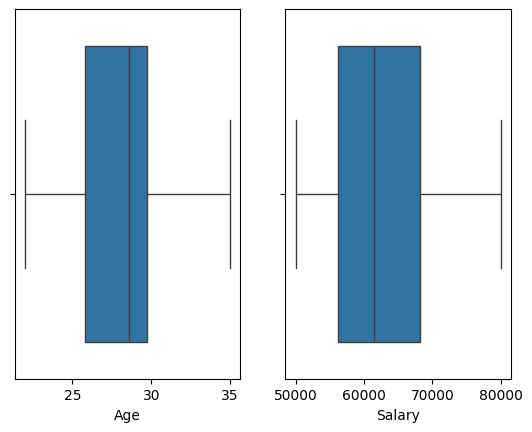

In [43]:
plt.subplot(1,2,1)
sns.boxplot(x="Age",data=df_copy)
plt.subplot(1,2,2)
sns.boxplot(x="Salary",data=df_copy)

In [44]:
q1 = df_copy["Salary"].quantile(0.25)
q3 = df_copy["Salary"].quantile(0.75)
print(q1,q3)

56250.0 68250.0


In [45]:
IQR = q3 - q1 

In [46]:
IQR
min_range = q1-(1.5*IQR)
max_range = q3-+(1.5*IQR)

In [47]:
print(min_range,max_range)

38250.0 50250.0


In [48]:
df_copy[df_copy["Salary"]>= max_range]

,Name,Age,Gender,Salary,Target
ID,,,,,
2,Ophrah,30.0,1,60000.0,1
3,Torben,22.0,1,70000.0,0
4,Masaharu,35.0,1,80000.0,1
5,Kaya,28.2,0,55000.0,0
6,Abaddon,29.0,1,63000.0,1


In [49]:
df_copy

,Name,Age,Gender,Salary,Target
ID,,,,,
1,Sara,25.0,0,50000.0,0
2,Ophrah,30.0,1,60000.0,1
3,Torben,22.0,1,70000.0,0
4,Masaharu,35.0,1,80000.0,1
5,Kaya,28.2,0,55000.0,0
6,Abaddon,29.0,1,63000.0,1


<h2>Question 10 -> KNN imputer</h2>

In [50]:
df_copy = df.copy()

In [51]:
df_copy

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,NaN,Female,55000.0,0
5,6,Abaddon,29.0,Male,NaN,1


In [52]:
from sklearn.impute import KNNImputer

In [53]:
k_imputer = KNNImputer(n_neighbors=2,weights="distance")

In [54]:
imputed_data = k_imputer.fit_transform(df_copy[["Age", "Salary"]])

In [55]:
df_copy[["Age","Salary"]] = imputed_data

In [56]:
df_copy

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,27.5,Female,55000.0,0
5,6,Abaddon,29.0,Male,58000.0,1


In [57]:
df_copy["Age"] = df_copy["Age"].astype("int32")

In [58]:
df_copy

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25,Female,50000.0,0
1,2,Ophrah,30,Male,60000.0,1
2,3,Torben,22,Male,70000.0,0
3,4,Masaharu,35,Male,80000.0,1
4,5,Kaya,27,Female,55000.0,0
5,6,Abaddon,29,Male,58000.0,1


<h3>Feature Selection using variance threshold</h3>

In [59]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

In [60]:
df_vt = df.copy()

In [61]:
df_vt

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,NaN,Female,55000.0,0
5,6,Abaddon,29.0,Male,NaN,1


In [62]:
df_vt["Age"] = df_vt["Age"].fillna(df["Age"].mean())
df_vt["Salary"] = df_vt["Salary"].fillna(df["Salary"].mean())

In [63]:
df_vt

,ID,Name,Age,Gender,Salary,Target
0,1,Sara,25.0,Female,50000.0,0
1,2,Ophrah,30.0,Male,60000.0,1
2,3,Torben,22.0,Male,70000.0,0
3,4,Masaharu,35.0,Male,80000.0,1
4,5,Kaya,28.2,Female,55000.0,0
5,6,Abaddon,29.0,Male,63000.0,1


In [64]:
le = LabelEncoder()

In [65]:
df_vt["gender_en"] = le.fit_transform(df_vt["Gender"])

In [66]:
df_vt_filtered = df_vt.loc[:,["ID","Age","Salary","Target","gender_en"]]

In [67]:
selector = VarianceThreshold(threshold=1.0)
selected_features = selector.fit_transform(df_vt_filtered)

# print(thisthat.shape)
selected_df = pd.DataFrame(selected_features, columns=df_vt_filtered.columns[selector.get_support()])

In [68]:
selected_df

,ID,Age,Salary
0,1.0,25.0,50000.0
1,2.0,30.0,60000.0
2,3.0,22.0,70000.0
3,4.0,35.0,80000.0
4,5.0,28.2,55000.0
5,6.0,29.0,63000.0


<h4>Question 13 --> handing class imbalance using random oversmapling </h4>

In [69]:
# !pip install imbalanced-learn

In [70]:
df_rs = df.copy()

In [71]:
x = df_rs.drop("Target",axis=1)
y = df["Target"]

In [72]:
x,y

(   ID      Name   Age  Gender   Salary
 0   1      Sara  25.0  Female  50000.0
 1   2    Ophrah  30.0    Male  60000.0
 2   3    Torben  22.0    Male  70000.0
 3   4  Masaharu  35.0    Male  80000.0
 4   5      Kaya   NaN  Female  55000.0
 5   6   Abaddon  29.0    Male      NaN,
 0    0
 1    1
 2    0
 3    1
 4    0
 5    1
 Name: Target, dtype: int64)

In [75]:
from imblearn.over_sampling import RandomOverSampler

In [76]:
ros = RandomOverSampler(random_state=42)

In [77]:
x_resampled,y_resampled = ros.fit_resample(x,y)

In [79]:
print(pd.concat([x_resampled, y_resampled], axis=1))


   ID      Name   Age  Gender   Salary  Target
0   1      Sara  25.0  Female  50000.0       0
1   2    Ophrah  30.0    Male  60000.0       1
2   3    Torben  22.0    Male  70000.0       0
3   4  Masaharu  35.0    Male  80000.0       1
4   5      Kaya   NaN  Female  55000.0       0
5   6   Abaddon  29.0    Male      NaN       1


<h4>Question 14 --> Applying polynomial feature for feature expansion </h4>

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [81]:
df_fe = df.copy()

In [84]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6 non-null      int64  
 1   Name    6 non-null      object 
 2   Age     5 non-null      float64
 3   Gender  6 non-null      object 
 4   Salary  5 non-null      float64
 5   Target  6 non-null      int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 416.0+ bytes


In [87]:
numeric_columns = df_fe.select_dtypes(include=["int64","float64"])

In [ ]:
si = SimpleImputer(strategy="mean")

In [90]:
transformed_numeric_columns = si.fit_transform(numeric_columns)

In [91]:
transformed_numeric_columns

array([[1.00e+00, 2.50e+01, 5.00e+04, 0.00e+00],
       [2.00e+00, 3.00e+01, 6.00e+04, 1.00e+00],
       [3.00e+00, 2.20e+01, 7.00e+04, 0.00e+00],
       [4.00e+00, 3.50e+01, 8.00e+04, 1.00e+00],
       [5.00e+00, 2.82e+01, 5.50e+04, 0.00e+00],
       [6.00e+00, 2.90e+01, 6.30e+04, 1.00e+00]])

In [92]:
numeric_cols_added = pd.DataFrame(transformed_numeric_columns,columns=numeric_columns.columns)

In [93]:
numeric_cols_added

,ID,Age,Salary,Target
0,1.0,25.0,50000.0,0.0
1,2.0,30.0,60000.0,1.0
2,3.0,22.0,70000.0,0.0
3,4.0,35.0,80000.0,1.0
4,5.0,28.2,55000.0,0.0
5,6.0,29.0,63000.0,1.0


In [94]:
pf = PolynomialFeatures(degree = 2)

In [95]:
x_poly = pf.fit_transform(numeric_cols_added)

In [96]:
x_poly

array([[1.0000e+00, 1.0000e+00, 2.5000e+01, 5.0000e+04, 0.0000e+00,
        1.0000e+00, 2.5000e+01, 5.0000e+04, 0.0000e+00, 6.2500e+02,
        1.2500e+06, 0.0000e+00, 2.5000e+09, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.0000e+00, 3.0000e+01, 6.0000e+04, 1.0000e+00,
        4.0000e+00, 6.0000e+01, 1.2000e+05, 2.0000e+00, 9.0000e+02,
        1.8000e+06, 3.0000e+01, 3.6000e+09, 6.0000e+04, 1.0000e+00],
       [1.0000e+00, 3.0000e+00, 2.2000e+01, 7.0000e+04, 0.0000e+00,
        9.0000e+00, 6.6000e+01, 2.1000e+05, 0.0000e+00, 4.8400e+02,
        1.5400e+06, 0.0000e+00, 4.9000e+09, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 4.0000e+00, 3.5000e+01, 8.0000e+04, 1.0000e+00,
        1.6000e+01, 1.4000e+02, 3.2000e+05, 4.0000e+00, 1.2250e+03,
        2.8000e+06, 3.5000e+01, 6.4000e+09, 8.0000e+04, 1.0000e+00],
       [1.0000e+00, 5.0000e+00, 2.8200e+01, 5.5000e+04, 0.0000e+00,
        2.5000e+01, 1.4100e+02, 2.7500e+05, 0.0000e+00, 7.9524e+02,
        1.5510e+06, 0.0000e+00, 3.0250e+09, 

<h4>Question 15 .Write a Pandas program to scale numerical features using Scikit-learn's RobustScaler.</h4>

In [97]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rs = RobustScaler()
si = SimpleImputer(strategy="mean")

In [101]:
df_rs = df.copy()

In [103]:
numerical_cols = df_rs.select_dtypes(include=["int64","float64"])

In [104]:
transformed_df = si.fit_transform(numerical_cols)

In [107]:
transformed_df = pd.DataFrame(transformed_df,columns=numeric_columns.columns)

In [109]:
transformed_df["Age"] = transformed_df["Age"].astype("int64")

In [113]:
transformed_df.drop(columns=["ID","Target"],inplace=True)

In [117]:
transformed_df

,Age,Salary
0,25,50000.0
1,30,60000.0
2,22,70000.0
3,35,80000.0
4,28,55000.0
5,29,63000.0


In [120]:
scaled_df  = pd.DataFrame(rs.fit_transform(transformed_df),columns=transformed_df.columns)

In [121]:
scaled_df

,Age,Salary
0,-0.875,-0.958333
1,0.375,-0.125000
2,-1.625,0.708333
3,1.625,1.541667
4,-0.125,-0.541667
5,0.125,0.125000
